In [4]:
from tars import Tars, markets, portfolios, traders, strategies
%matplotlib inline

# Develop your own trading strategy

Here's an example to show how you can develop your own strategy. This notebook is a template for you to start your own thing.

### Here's the strategy in development

It's actually a copy of the TrendFollowingMACD.

In [8]:
import pandas as pd
from ta.trend import MACD

from tars.evaluators.trader_evaluator import TraderEvaluator
from tars.strategies.abstract_strategy import AbstractStrategy


class MyStrategy(AbstractStrategy):
    """
    The best strategy

    :param trader: Trader
        The Trader handling a portfolio
    :param pair: str
        The pair e.g. XETHZUSD to buy and hold
    :param volume: float
        The volume of the pair's quote buy
    :param validate: boolean
        Safety Boolean to make sure not to trade real money by default

    :ivar evaluator: AbstractEvaluator
        Evaluator allows for the evaluation of a strategy
    :ivar market: AbstractMarket
        Market object to get information from
    """

    def __init__(self, trader, pair, volume, validate=True):
        self.name = 'My strategy'
        self.trader = trader
        self.pair = pair
        self.volume = volume
        self.validate = validate
        self.evaluator = TraderEvaluator(self.trader)


    def run(self):
        """ Run the strategy """
        # 1. Add a checkpoint to the evaluator
        balance = self.trader.portfolio.get_trade_balance().loc['eb'].ZUSD   
        self.evaluator.add_checkpoint(pd.Timestamp.utcnow(), balance)
        
        # 2. Process the data
        df0 = self.trader.market.get_ohlc_data(pair=self.pair)[0]['close'].iloc[::-1]

        # 3. Get the relevant signal informations
        macd = MACD(df0)
        line = macd.macd()[-1]
        signal = macd.macd_signal()[-1]

        # 4. Implement the trading logic
        if signal < line:
            self.trader.add_order(pair=self.pair, type='buy',
                                  ordertype='market', volume=self.volume,
                                  validate=self.validate)
        elif signal >= line:
            self.trader.add_order(pair=self.pair, type='sell',
                                  ordertype='market', volume=self.volume,
                                  validate=self.validate)
        else:
            pass
        
    def test():
        raise NotImplementedError


## Instanciate Tars

Then, it is as usual.

In [9]:
api_key = f'../kraken.key'

In [10]:
market = markets.CryptoMarket()

portfolio_1 = portfolios.VirtualPortfolio({'ZUSD': 1000})
trader_1 = traders.VirtualCryptoTrader(market, portfolio_1)
strategy_1 = strategies.BuyAndHold(trader_1, 'XETHZUSD', 0.2)

portfolio_2 = portfolios.VirtualPortfolio({'ZUSD': 1000})
trader_2 = traders.VirtualCryptoTrader(market, portfolio_2)

# Here's where you use your newly developed strategy
strategy_2 = MyStrategy(trader_2, 'XETHZUSD', 0.2)

In [11]:
# Create Tars and load its strategies
tars = Tars()
tars.load(strategy_1)
tars.load(strategy_2)

 🤖 TARS : Welcome to Endurance! 👨‍🚀
 🤖 TARS : Loaded strategy ➡️ Buy and hold
 🤖 TARS : Loaded strategy ➡️ My strategy


## Start the bot

In [12]:
tars.start('00:00:10')

 🤖 TARS : Starting trading session 📈
 ⏱ Trading decision will be taken every : 00:00:10️ (hh:mm:ss)
 💪️ Loading :   
   🧵 'Thread-8' ➡️ 'Buy and hold'
   🧵 'Thread-9' ➡️ 'My strategy'
public call frequency exceeded (seconds=0.002978) 
 sleeping for 5 seconds


## Evaluate the strategy

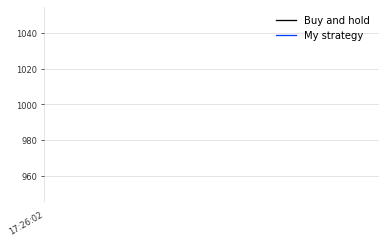

In [17]:
tars.plot()

In [19]:
tars.evaluate()

,Buy and hold,My strategy
2021-10-11 17:26:00+00:00,1000.0,1000.0


public call frequency exceeded (seconds=0.552415) 
 sleeping for 5 seconds
 The base XETH isn't available in the portfolio.
public call frequency exceeded (seconds=0.543514) 
 sleeping for 5 seconds
 The base XETH isn't available in the portfolio.
public call frequency exceeded (seconds=0.425912) 
 sleeping for 5 seconds
public call frequency exceeded (seconds=0.414763) 
 sleeping for 5 seconds
public call frequency exceeded (seconds=0.389411) 
 sleeping for 5 seconds
public call frequency exceeded (seconds=0.416122) 
 sleeping for 5 seconds
public call frequency exceeded (seconds=0.621665) 
 sleeping for 5 seconds
public call frequency exceeded (seconds=0.435504) 
 sleeping for 5 seconds
public call frequency exceeded (seconds=0.478558) 
 sleeping for 5 seconds
public call frequency exceeded (seconds=0.443527) 
 sleeping for 5 seconds
public call frequency exceeded (seconds=0.373051) 
 sleeping for 5 seconds
public call frequency exceeded (seconds=0.533619) 
 sleeping for 5 seconds
pu

## Stop the bot

In [16]:
tars.stop()

 🤖 TARS : ✋ Stopped all strategies


---